# Введение в машинное обучение

Сперва без машинного обучения

Машинное обучение -- это подбор модели, которая описывает данные и способна предсказать поведение будущих данных. В простейшем случае это фитирование функции. Фитирование функции -- это подбор такой функции, которая описывает одномерные данные. То есть имеется одномерный массив `x`, каждому элементу которого поставлено в соответствие одно число из массива `y`. Этим и займемся.

In [1]:
import numpy as np
import matplotlib.pyplot as mp

Смоделируем некие абстрактные данные с линейной зависимостью

x - в каких точках производились измерения

y - значения измерений

In [2]:
n = 10
x = np.random.randint(0, 100, n)
def linear_fun(x, p):
    return p * x
y = linear_fun(x, 2.)
y += np.random.normal(0., 10., n)

Покажем наши данные на графике, а также проведем прямую, согласно которой мы ранее смоделировали данные.

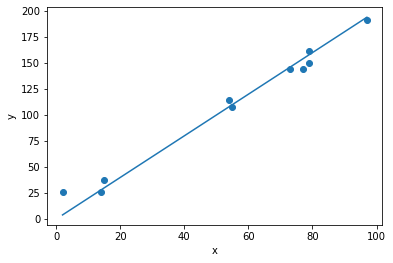

In [3]:
mp.scatter(x, y)
mp.xlabel('x')
mp.ylabel('y')
mp.plot([x.min(), x.max()], 
        linear_fun(np.array([x.min(), x.max()]), 2.))
mp.show()

Зададим функционал потерь

Функционал потерь для каждой функции $f(x, p)$ возвращает число, которое соответствует качеству, с которым функция описывает данные. Чаще других используется квадратичный функционал потерь (или еще квадратичная ошибка):

$L = \sum_i (f(x_i, p) - y_i)^2$

где суммирование производится по всем точкам $(x_i, y_i)$.

In [4]:
def loss(f, x, y, p):
    return ((f(x, p) - y)**2).sum()

В формуле для $L$ находится разница $f(x_i, p) - y_i$. Покажем ее на графике:

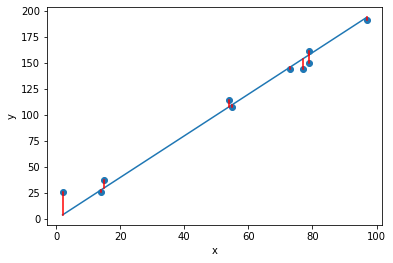

In [5]:
mp.scatter(x, y)
mp.xlabel('x')
mp.ylabel('y')
mp.plot([x.min(), x.max()], 
        linear_fun(np.array([x.min(), x.max()]), 2.))
for x_el, y_el in zip(x, y):
    mp.plot([x_el, x_el], [linear_fun(x_el, 2.), y_el], 'r')
mp.show()

Функционал потерь равен сумме квадратов длин красных отрезков.

Зачем нужно возведение в квадрат? Какие альтернативы возведению в квадрат приходят на ум?

Можно попробовать руками, какие значения принимает `loss` при различных значениях параметра `p`. 

- При каком значении `p` получается минимум?
- Почему это значение не равно 2?
- Почему минимальное значение потерь не равно нулю?
- От чего зависит минимальное значение функционала потерь?
- Может ли у нашего функционала потерь быть два (или больше) минимума?
- Есть ли у функционала потерь 

In [6]:
loss(linear_fun, x, y, 1.97)

713.5212673946578

Получается, что нам нужно найти такое значение $p$, при котором функционал потерь $L$ имеет минимальное значение. Заметим, что при данном конкретном виде функции $f$ функционал превращается просто в функцию от единственного аргумента $p$. А из высшей математики мы знаем, что минимум функции там, где ее производная равна нулю.

Если мы знаем вид функции $f$, то производная находится аналитически. Иначе пришлось бы искать ее численно. Это тоже возможно, но нам сейчас это не так интересно.

В нашем случае

$\frac{dL}{dp} = \sum_i 2 (f(x_i, p) - y_i) \frac{df(x_i, p)}{dp}$

$f(x, p) = px$

$\frac{df(x_i, p)}{dp} = x_i$

$\frac{dL}{dp} = \sum_i 2 (x_i p - y_i) x_i$

In [7]:
def grad(x, y, p):
    return 2 * ((x * p - y) * x).sum()

Попробовать поискать руками ноль градиента.

- Какой знак имеет значение градиента слева от минимума $L$? Скажем, в точке 1.
- Какой знак имеет значение градиента справа от минимума $L$? Скажем, в точке 3.
- О чем это говорит?

Как уже было сказано, необходимым условием минимума функции является равенство нулю ее производной:

$\frac{dL}{dp} = \sum_i 2 (x_i p - y_i) x_i = 0$

Решая полученное уравнение относительно $p$ получаем

$2 p \sum_i x_i^2 - 2 \sum_i x_i y_i = 0$

$p = \frac{\sum_i x_i y_i}{\sum x_i^2}$

In [8]:
def fit(x, y):
    '''
    Returns the value of p that fits best the
    linear dependence of y on x in the form of
    y = x * p
    '''
    return (x * y).sum() / (x**2).sum()

In [9]:
fit(x, y)

1.9693484837865598

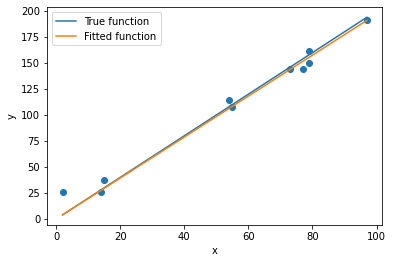

In [10]:
mp.scatter(x, y)
mp.xlabel('x')
mp.ylabel('y')
mp.plot([x.min(), x.max()], 
        linear_fun(np.array([x.min(), x.max()]), 2.), label='True function')
mp.plot([x.min(), x.max()], 
        linear_fun(np.array([x.min(), x.max()]), fit(x, y)), label='Fitted function')
mp.legend()
mp.show()

Заметим, что для данной задачи нам удалось получить _аналитическое_ решение, не прибегая к численным методам. Это удается далеко не всегда.

Задача: написать функцию `fit`, которая бы фитировала линейную зависимость между двумя переменными в общем виде. То есть

$f = p_0 + p_1 x$

Для этого требуется вычислить градиент функии $L(p_0, p_1)$. Градиент -- это та же производная, только адаптированная для многомерных функций. Это уже не число, а вектор, в нашем случае длиной 2. По определению

$$grad L = \nabla L = \left \{ \frac{\partial L}{\partial p_0}, \frac{\partial L}{\partial p_1} \right \}$$

$$L = \sum_i (f(x_i, p_0, p_1) - y_i)^2 = \sum_i (p_0 + p_1  x_i - y_i)^2$$

$$\frac{\partial L}{\partial p_0} = \sum_i 2 (p_0 + p_1  x_i - y_i)$$

$$\frac{\partial L}{\partial p_1} = \sum_i 2 (p_0 + p_1  x_i - y_i) x_i$$

$$\nabla L = \left \{ \sum_i 2 (p_0 + p_1  x_i - y_i), \sum_i 2 (p_0 + p_1  x_i - y_i) x_i \right \}$$

Необходимым условием минимума двумерной функции $L$ является равенство нулю обеих компонент градиента. То есть мы получили систему из двух линейных уравнений относительно $p_0$ и $p_1$. Ее надо решить и решение записать в функцию `fit`.

In [35]:
def fit(x, y):
    '''
    Returns the values p0 and p1 that fit best the
    linear dependence of y on x in the form of
    y = p0 + x * p1
    '''
    # Here is your code
    p0 = None
    p1 = None
    return p0, p1

Смоделировать данные и проверить работоспособность `fit`.

Предлагается взять те же точки $(x, y)$, только сместить их вверх, скажем, на 100:

    mp.scatter(x, y + 100)
    p0, p1 = fit(x, y + 100)

В итоге мы получим значение $p_0$ близким к 100, и значение $p_1$ близким к 2. Равно ли новое значение наклона прямой найденному ранее? Почему?